# Proposal Study

This proposal employs a factorial design approach to construct a surrogate model. The aim is the reconstruction of 2D fields acquired through Reynolds Averaged Navier Stokes (RANS) solutions, involving conjugate heat transfer of the nozzle flow.

## Nozzle Flow and Heat Transfer

Rocket nozzles hold paramount importance in aerospace propulsion. The optimal aerodynamic design of these nozzles is inherently limited by the need to maintain structural integrity, as they are subjected to intense heat transfer from the hot gases to the inner walls.


|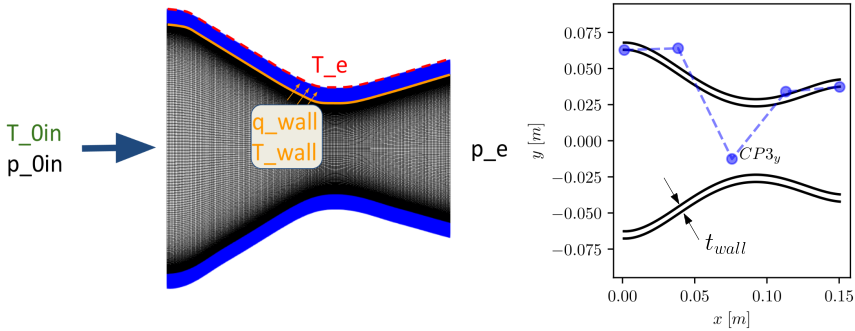|
|:-:|
| Representation of Nozzle numerical domain and boundary conditions|

# Main Hypotesis

The central hypothesis poses that the factorial design could be effective in acquiring a model with the capacity to predict the principal components of a reduced-order model of fluid flow and heat transfer. This model, once established, can then be used to reconstruct complete two-dimensional flow fields from the designated independent variables.


## Experimental Samples


To test this hypothesis, a series of numerical experiments will be conducted following the Central Composite Design (CCD)

- Inlet Total Temperature, $T_{0in}$ [K]
- Inlet Total Pressure, $p_{0in}$ [Pa]
- Wall Thickness, $t_{wall}$ [m]
- Nozzle Shape Control Point, $CP3_y$ [m]
- External Nozzle Wall Temperature, $T_e$ [K]

The [SU2](https://su2code.github.io/) software [(Economon et al., 2016)](https://su2code.github.io/documents/AIAA-2018-3111.pdf) was employed to address the conjugate heat transfer interfaces between
the fluid and solid in the nozzle. In the fluid domain, the Reynolds Averaged Navier-Stokes equations were solved using the finite volume method and the SST (Shear Stress Transport) turbulence model. To obtain the steady-state solution, the implicit Euler integration method was utilized in conjunction with time marching. On the other hand, for the solid domain, the energy equation was solved.

# Central Composite Design


The range of variables were choosen in order to be within real experiments made by [(Back et al., 1964)](https://ntrs.nasa.gov/api/citations/19650010083/downloads/19650010083.pdf) . Another factor taking into account to limit variable ranges is the numerical stability of conjugate heat transfer CFD.


In [1]:
from explann.doe import CentralCompositeDesign
import pandas as pd

variables = {
    't_wall': [0.001, 0.010],               #[m]
    'CP3_y': [-0.01255805, 0.0],            #[m]
    'T_0in': [400.0, 650.0],                #[K]
    'p_0in': [4.0e5, 1.0e6],                #[Pa]
    'T_e': [290.0, 400.0],                  #[K]
}

# variable ranges
pd.DataFrame(variables)

,t_wall,CP3_y,T_0in,p_0in,T_e
0,0.001,-0.012558,400.0,400000.0,290.0
1,0.010,0.000000,650.0,1000000.0,400.0


A CCD (Central Composite Desig) was choosen in order to be able to capture any high order interaction fo the design variables.

In [2]:
ccd = CentralCompositeDesign(
    variables=variables,
    center=(1,0),
    alpha='r',
    face='ccc',
)
ccd.doe

,t_wall,CP3_y,T_0in,p_0in,T_e
Index,,,,,
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,-1.000000,1.000000,-1.000000,-1.000000,-1.000000
4,1.000000,1.000000,-1.000000,-1.000000,-1.000000
5,-1.000000,-1.000000,1.000000,-1.000000,-1.000000
6,1.000000,-1.000000,1.000000,-1.000000,-1.000000
7,-1.000000,1.000000,1.000000,-1.000000,-1.000000
8,1.000000,1.000000,1.000000,-1.000000,-1.000000
9,-1.000000,-1.000000,-1.000000,1.000000,-1.000000


In [3]:
ccd.levels

,t_wall,CP3_y,T_0in,p_0in,T_e
Levels,,,,,
-2.378414,0.001000,-0.012558,400.000000,400000.000000,290.000000
-1.000000,0.003608,-0.008919,472.443974,573865.537712,321.875349
0.000000,0.005500,-0.006279,525.000000,700000.000000,345.000000
1.000000,0.007392,-0.003639,577.556026,826134.462288,368.124651
2.378414,0.010000,0.000000,650.000000,1000000.000000,400.000000


This DoE variables was then used as boundary conditions for the CFD(Computational Fluid Dynamics) numerical experiments. The 43 runs accounts for accounts for 429.6MB of data stored in a `HDF5` file, from wich, the seleceted fields were choosen to build snapshot matrices

```'Heat_Flux_UPPER_WALL', 'Mach', 'Pressure', 'Temperature', 'Temperature_Solid', 'Temperature_Solid_INNERWALL'```



For each experiment a snapshot vector $\mathbf{S_i}$, corresponding to the concatation of fluid and solid domain 2D numerical solutions were obtained.

$$
\mathbf{S_i}(T_{0in},p_{0in},t_{wall}, CP3_y) = \begin{bmatrix}
    \mathbf{q_{upperWall}}\\
    \mathbf{p_{fluid}} \\
    \mathbf{T_{fluid}} \\
    \mathbf{M_{fluid}} \\
    \mathbf{T_{solid}} \\
    \mathbf{T_{solidInner}} \\
\end{bmatrix}^{252840 \times 1 }
$$

, the snapshots $\mathbf{S_i}$ were then concatenated to form the snapshot matrix $\mathbf{A}$ of the Design of Experimen (DoE).

$$
\mathbf{A} = \begin{bmatrix}
    \mathbf{S_1^T} \\
    \mathbf{S_2^T} \\
    \vdots \\
    \mathbf{S_N^T} \\  
\end{bmatrix}^{43 \times 252840 }
$$

In [4]:
import sys
sys.path.append('/home/ppiper/Dropbox/local/github/frog')

from frog.datahandler import HDF5Handler

hfdh = HDF5Handler(
    datapath='/home/ppiper/Dropbox/local/github/explann/data/experimental_planning_T0in_limit_clear/hf_transpose.h5',
    datasets = ['Heat_Flux_UPPER_WALL', 'Mach', 'Pressure', 'Temperature', 'Temperature_Solid', 'Temperature_Solid_INNERWALL'],
)

# Dependent variables (Order Reduction)

The high dimensional space of samples will subsequently submited to an order reduction, giveng by Principal Component Analysis (PCA), resulting into a more manageable, low-dimensional orthogonal basis. Subsequently, a factorial model will be fitted to predict the principal components as a function of the independent variables. The resultant model will then be applied to reconstruct flow field and heat transfer aspects for a designated test set of independent variables. This reconstructed output will be compared against the CFD solutions for error analysis.

The dependent variables are principal componentes of a POD(Proper Orthogonal Decompostion) of the snapshots matrix $\mathbf{A}$

$$
\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V^T}\\
$$

by truncanting the diagonal matrix of singular values $\mathbf{\Sigma}$, the snapshot matrix can be represented in terms o a reduced basis $\mathbf{\tilde U}$ and principal components $\mathbf{\tilde \Lambda}$

$$
\mathbf{\tilde A} = \mathbf{\tilde U} \mathbf{\tilde \Lambda}
$$

The data were then compressed using 10 principal components of the orthogonal projection, resulting in 24.3MB of data. An approximated 20-fold reduction in storage requirments.

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from frog.normalization import Normalization, DataHandlerNormalization
import pickle

rom = Pipeline([
    ('scaler', Normalization(bounds=[-1,1])),
    ('pca', PCA(n_components=10)),
])

rom.fit(hfdh.data)

results_pc = rom.transform(hfdh.data)

with open('/home/ppiper/Dropbox/local/github/explann/data/experimental_planning_T0in_limit_clear/rom.pkl','wb') as f:
    pickle.dump(rom,f)

with open('/home/ppiper/Dropbox/local/github/explann/data/experimental_planning_T0in_limit_clear/rom.pkl','rb') as f:
    rom = pickle.load(f)

The principal components are then joined to the CCD DoE to form full tables for factorial model construction.

In [6]:
import pandas as pd
results = {f'L{i}': results_pc[:,i] for i in range(results_pc.shape[1])}

ccd.append_results(results)
ccd.doe

,t_wall,CP3_y,T_0in,p_0in,T_e,L0,L1,L2,L3,L4,L5,L6,L7,L8,L9
Index,,,,,,,,,,,,,,,
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,47.655208,-2.574525,1.054864,0.116466,0.006886,0.026542,-0.019255,0.012261,-0.003517,-0.003013
2,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,47.657308,-2.584284,1.705080,-0.057877,0.004462,0.046149,-0.004435,-0.013983,0.008446,-0.001133
3,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,47.482853,2.523185,1.070312,0.115771,0.007093,0.020386,-0.025199,0.005370,-0.005530,-0.004666
4,1.000000,1.000000,-1.000000,-1.000000,-1.000000,47.484867,2.512161,1.748841,-0.031342,0.003471,0.026343,-0.011534,-0.007418,0.008019,-0.007382
5,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,47.629272,-2.501821,-1.897897,0.122485,-0.010489,-0.061067,0.013869,0.004764,0.001125,-0.008234
6,1.000000,-1.000000,1.000000,-1.000000,-1.000000,47.632879,-2.517772,-0.854666,-0.157822,-0.009886,-0.029965,0.015498,-0.008033,0.008307,0.003685
7,-1.000000,1.000000,1.000000,-1.000000,-1.000000,47.456260,2.599557,-1.962213,0.058714,-0.004065,-0.022829,-0.001661,-0.012595,-0.013704,0.005997
8,1.000000,1.000000,1.000000,-1.000000,-1.000000,47.459997,2.581783,-0.875525,-0.179893,-0.005059,-0.016389,-0.003456,-0.008670,-0.003721,0.009605
9,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-47.418552,-3.711689,1.184190,0.148468,0.003752,-0.001800,0.000860,0.003282,-0.012650,0.009544


# Fitting Factorial Model

The CCD factorial model accounts for second order terms in each $\mathbf{L_i}$ componenent of the $\mathbf{\Lambda}$ matrix.

In [7]:
from explann.models import FactorialModel
from explann.dataio import ImportString, ImportXLSX
from explann.plot import ParetoPlot
import matplotlib.pyplot as plt

expressions = {f'{key}': f'{key} ~ 1 + t_wall * CP3_y * T_0in * p_0in * T_e + np.power(t_wall, 2) + np.power(T_0in, 2) + np.power(p_0in, 2) + np.power(CP3_y,2) + np.power(CP3_y, 2)' for key in results.keys()}

fm_ccd = FactorialModel(
    data = ccd.doe,
    functions = expressions,
    levels = ccd.levels,
)
expressions

{'L0': 'L0 ~ 1 + t_wall * CP3_y * T_0in * p_0in * T_e + np.power(t_wall, 2) + np.power(T_0in, 2) + np.power(p_0in, 2) + np.power(CP3_y,2) + np.power(CP3_y, 2)',
 'L1': 'L1 ~ 1 + t_wall * CP3_y * T_0in * p_0in * T_e + np.power(t_wall, 2) + np.power(T_0in, 2) + np.power(p_0in, 2) + np.power(CP3_y,2) + np.power(CP3_y, 2)',
 'L2': 'L2 ~ 1 + t_wall * CP3_y * T_0in * p_0in * T_e + np.power(t_wall, 2) + np.power(T_0in, 2) + np.power(p_0in, 2) + np.power(CP3_y,2) + np.power(CP3_y, 2)',
 'L3': 'L3 ~ 1 + t_wall * CP3_y * T_0in * p_0in * T_e + np.power(t_wall, 2) + np.power(T_0in, 2) + np.power(p_0in, 2) + np.power(CP3_y,2) + np.power(CP3_y, 2)',
 'L4': 'L4 ~ 1 + t_wall * CP3_y * T_0in * p_0in * T_e + np.power(t_wall, 2) + np.power(T_0in, 2) + np.power(p_0in, 2) + np.power(CP3_y,2) + np.power(CP3_y, 2)',
 'L5': 'L5 ~ 1 + t_wall * CP3_y * T_0in * p_0in * T_e + np.power(t_wall, 2) + np.power(T_0in, 2) + np.power(p_0in, 2) + np.power(CP3_y,2) + np.power(CP3_y, 2)',
 'L6': 'L6 ~ 1 + t_wall * CP3_y * 

As can be viewed in pareto plots, not all terms are significant, so we can retaing fewer terms.

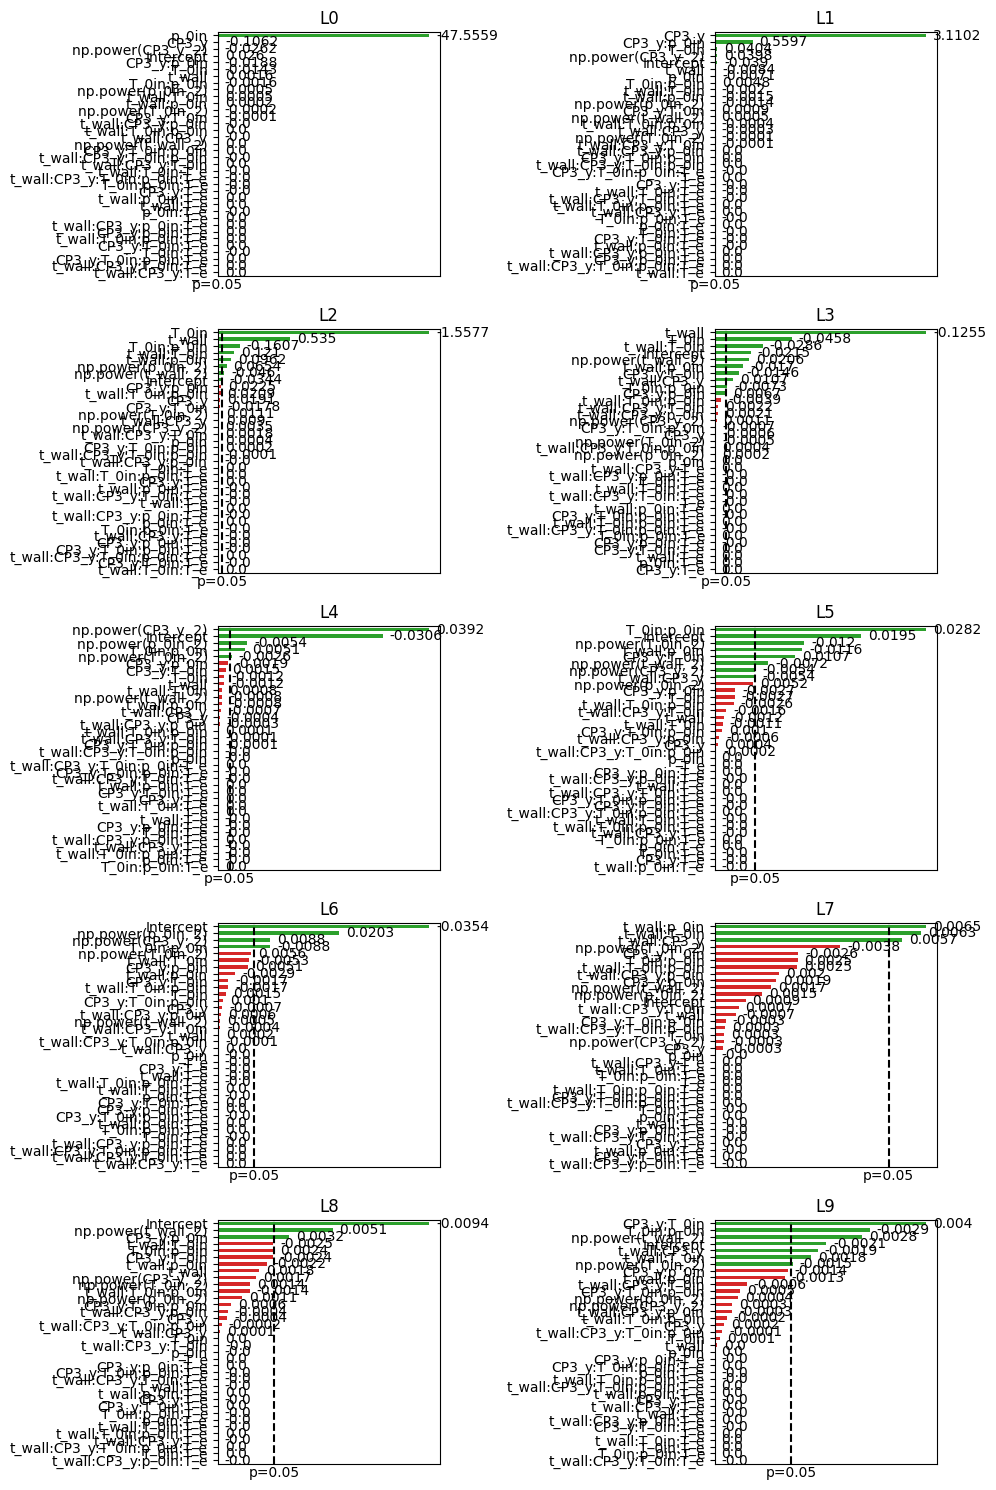

In [8]:
from explann.plot import ParetoPlot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5,2, figsize=(10,15))
ax = ax.flatten()

pp = ParetoPlot(fm_ccd)

pp.plot(ax=ax)
plt.tight_layout()

In [9]:
fm_ccd.get_significant_model_functions()
fm_ccd_full = fm_ccd
fm_ccd = fm_ccd.build_significant_models()

# Resulting Model for principal components

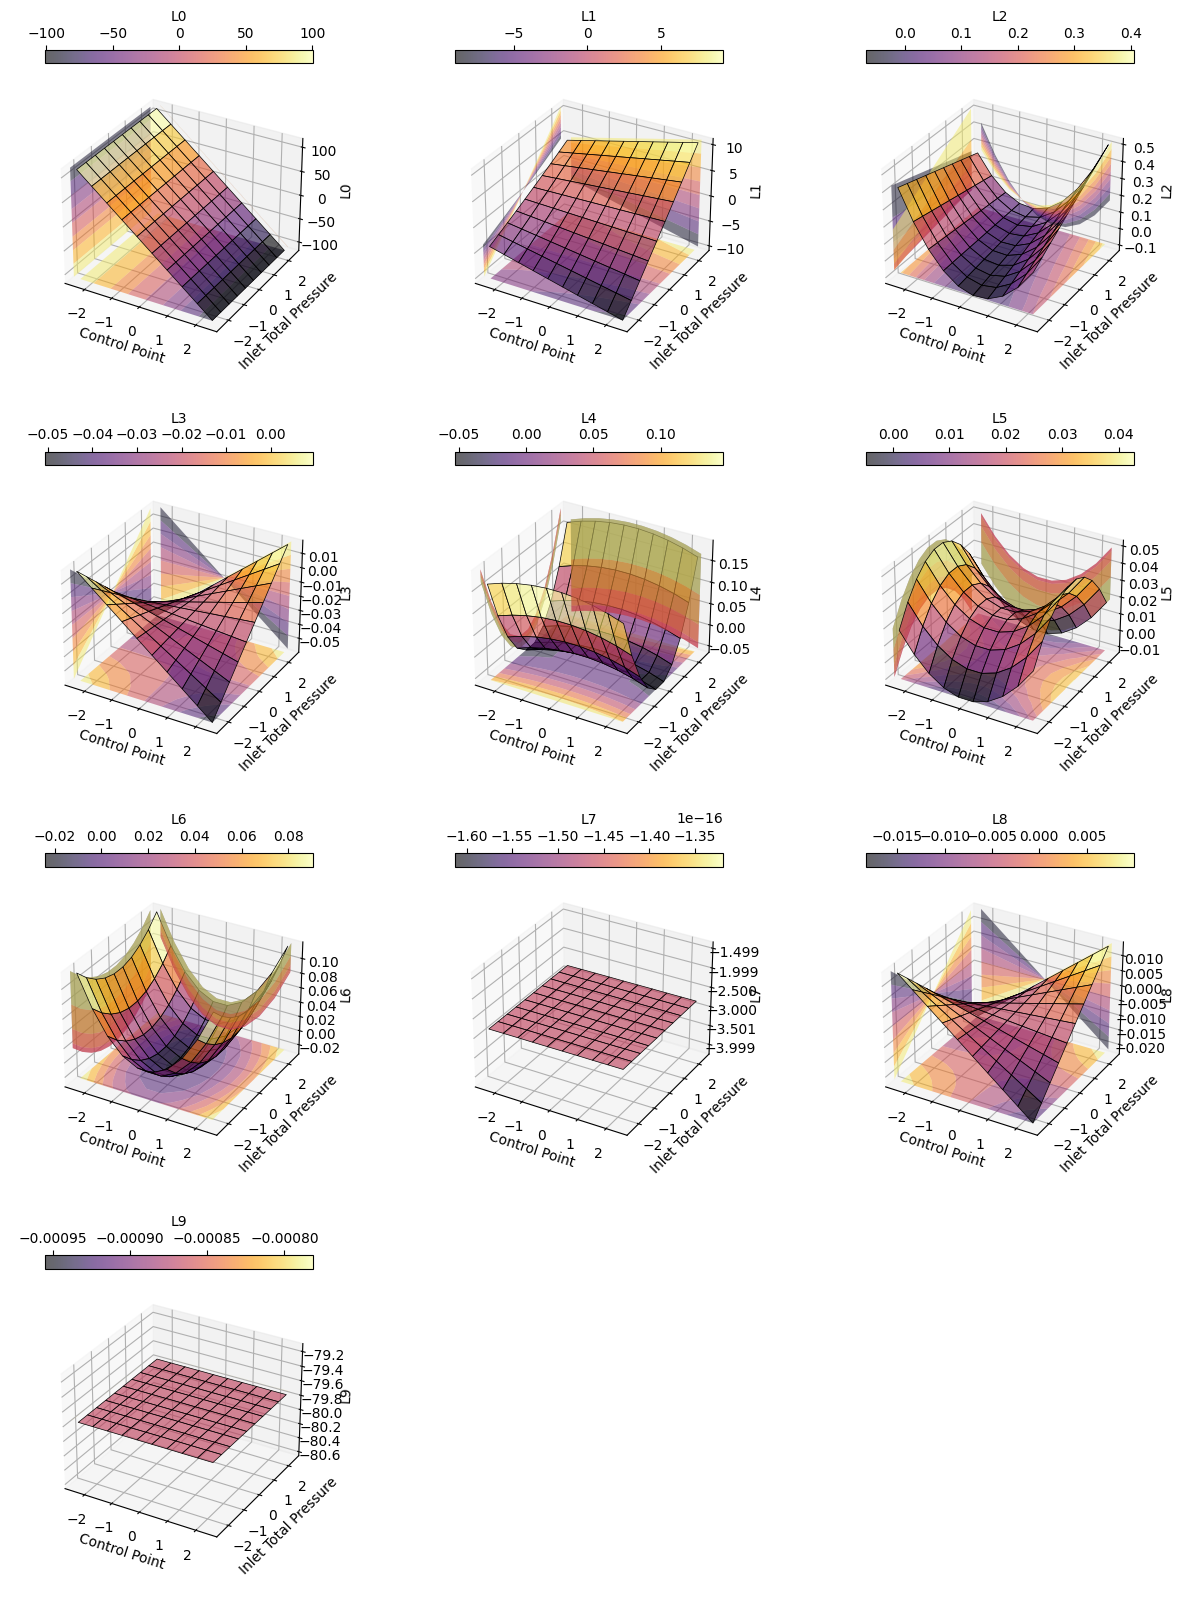

In [10]:
from explann.plot import plot_surface

fig, ax = plt.subplots(4,3, figsize=(15,20),subplot_kw={"projection": "3d"})
ax = ax.flatten()
    
for i,axi in enumerate(ax):#fm_ccd.functions.items()):
    if i<len(fm_ccd.functions.items()):
        key = list(fm_ccd.functions.keys())[i]
        plot_surface(x='p_0in', y='CP3_y', z=key, 
             model=fm_ccd,  
             n_pts=10, 
             ax=ax[i], 
             other_params=dict(t_wall=0,T_0in=0,T_e=0),
             labels=dict(xlabel='Control Point', ylabel='Inlet Total Pressure', zlabel=key), cmap='inferno', scaled=False)
    else:
        ax[i].set_axis_off()
        

# Test Model Accuracy

The model accuracy was tested by comparing flow reconstruction with full numerical solution for an unseeing set of independent variables

In [11]:
import numpy as np

def surrogate(model, variables, rom=None):
    independent_vars_coded = {}
    independent_vars = variables.copy()
    for var, value in independent_vars.items():
        independent_vars_coded[var] = np.interp(value,  model.levels[f'{var}'].values, model.levels.index.values)

    L_predicted = []
    for dependent in model.dependent_variables:
        L_predicted.append(model[dependent].predict(independent_vars_coded).item())

    L_predicted = np.array(L_predicted)

    if rom is not None:
        L_predicted = rom.inverse_transform(L_predicted)

    return L_predicted

surrogate_solution = surrogate(
    model=fm_ccd_full,
    variables={
        't_wall': 0.006044329228014826,
        'CP3_y': -0.001277584765410799,
        'T_0in': 616.0,
        'p_0in': 456429.13834591914,
        'T_e': 318.0
    },
    rom=rom)

inverse_transform


In [12]:
from plot_2d import plot_property

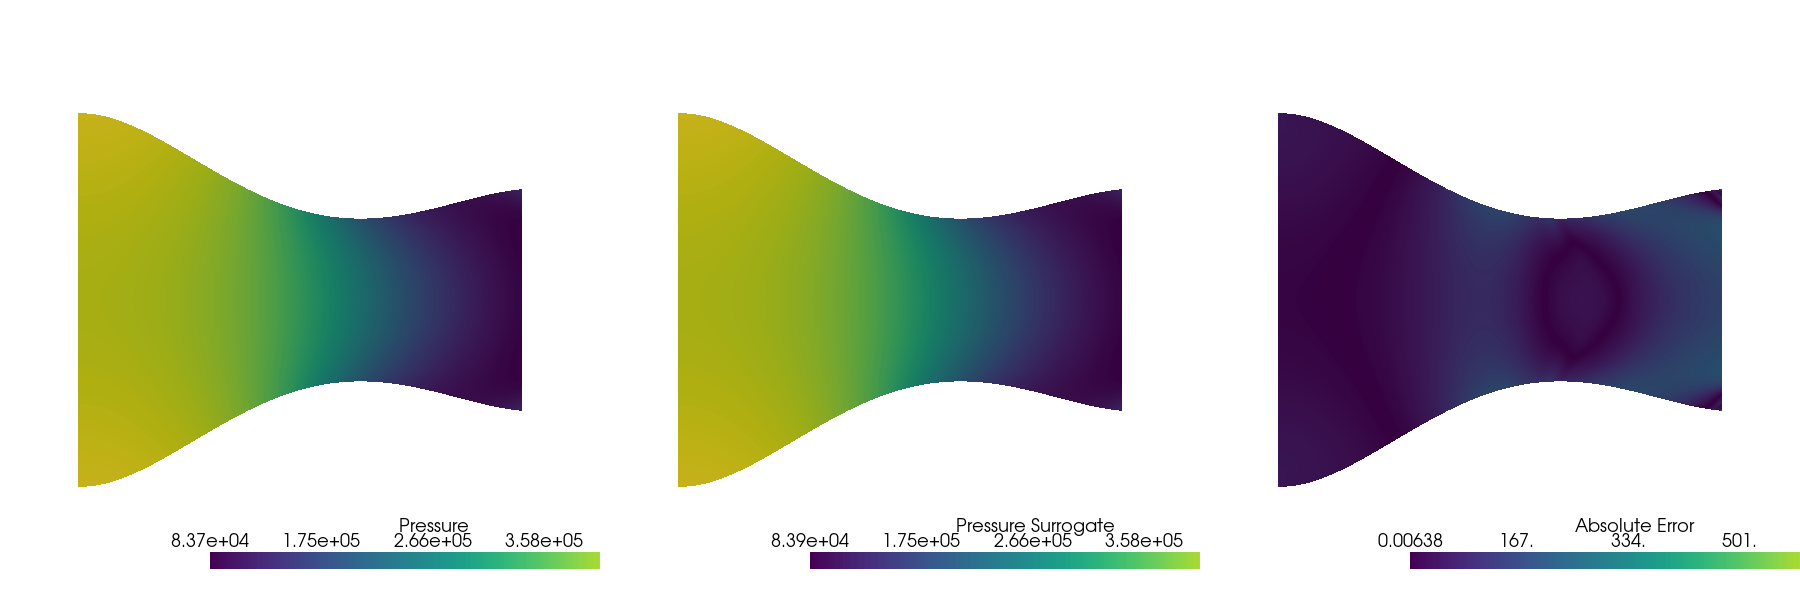

In [13]:
plot_property( 
    prop='Pressure', 
    unseeing_path='/home/ppiper/Dropbox/local/github/explann/data/lhs/10/SU2/outputs/cht_setupSU2.vtm', 
    surrogate_solution=surrogate_solution, 
    hfdh=hfdh, 
    solid=False)

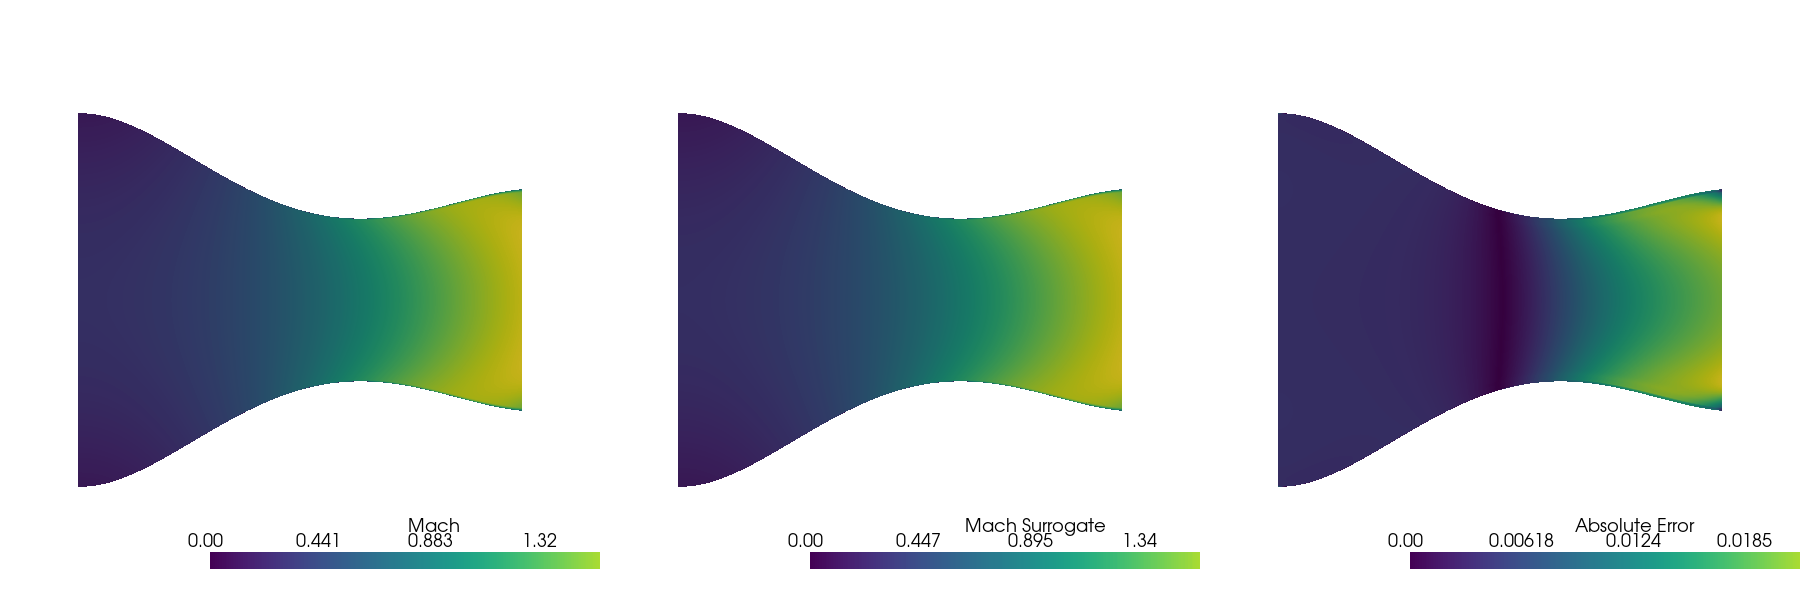

In [14]:
plot_property( 
    prop='Mach', 
    unseeing_path='/home/ppiper/Dropbox/local/github/explann/data/lhs/10/SU2/outputs/cht_setupSU2.vtm', 
    surrogate_solution=surrogate_solution, 
    hfdh=hfdh, 
    solid=False)

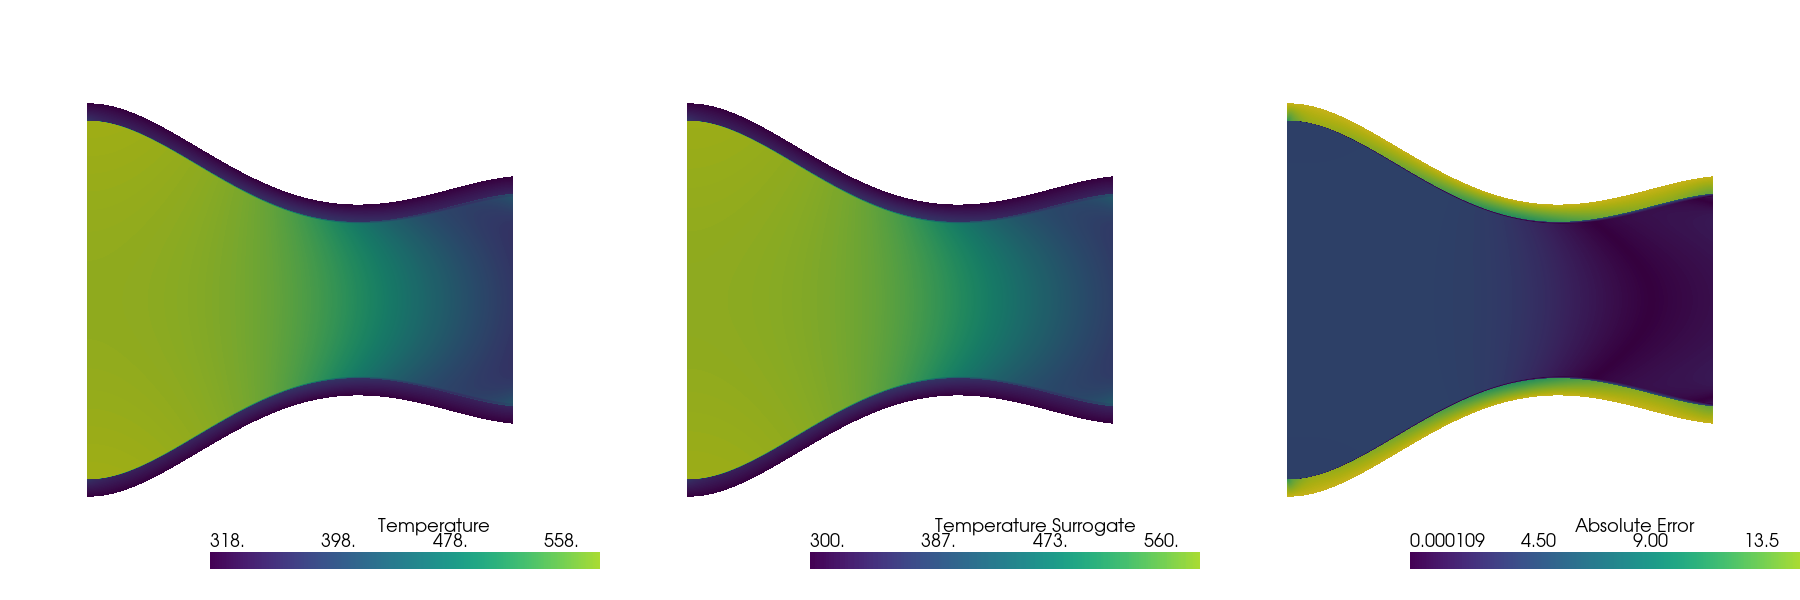

In [15]:
plot_property( 
    prop='Temperature', 
    unseeing_path='/home/ppiper/Dropbox/local/github/explann/data/lhs/10/SU2/outputs/cht_setupSU2.vtm', 
    surrogate_solution=surrogate_solution, 
    hfdh=hfdh, 
    solid=True)

# References

Back, L.H., Massier, P.F. and Gier, H.L., 1964. “Convective heat transfer in a convergent-divergent nozzle”. International Journal of Heat and Mass Transfer, Vol. 7, pp. 549–568.

Economon, T.D., Palacios, F., Copeland, S.R., Lukaczyk, T.W. and Alonso, J.J., 2016. “SU2: An open-source suite for multiphysics simulation and design”. AIAA Journal, Vol. 54, No. 3, pp. 828–846. doi:10.2514/1.j053813.
